In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from seaborn import palplot
import seaborn as sns
import seaborn as sns

# Map Cleaning 

In [2]:
#Loading the shape files, adm1 = state level, adm2 = district level
adm2 = gpd.read_file('data/ShapeFiles/IND_adm2.shp')
adm1 = gpd.read_file('data/ShapeFiles/IND_adm1.shp')

In [3]:
#Retrieving only required columns
variables = ['NAME_1','geometry']

adm2 = adm2.loc[:,variables]
adm1 = adm1.loc[:,variables]

In [4]:
#Replacing state names in shape files for uniformity and to be in sync with the other data

adm1['NAME_1'] = adm1['NAME_1'].replace('Andaman and Nicobar','Andaman & Nicobar Island')
adm2['NAME_1'] = adm2['NAME_1'].replace('Andaman and Nicobar','Andaman & Nicobar Island')

adm1['NAME_1'] = adm1['NAME_1'].replace('Dadra and Nagar Haveli','Dadara & Nagar Havelli')
adm2['NAME_1'] = adm2['NAME_1'].replace('Dadra and Nagar Haveli','Dadara & Nagar Havelli')

#Delhi is being called NCT - National Capittal Territory of Delhi 
adm1['NAME_1'] = adm1['NAME_1'].replace('Delhi','NCT of Delhi')
adm2['NAME_1'] = adm2['NAME_1'].replace('Delhi','NCT of Delhi')

adm1['NAME_1'] = adm1['NAME_1'].replace('Daman and Diu','Daman & Diu')
adm2['NAME_1'] = adm2['NAME_1'].replace('Daman and Diu','Daman & Diu')

adm1['NAME_1'] = adm1['NAME_1'].replace('Jammu and Kashmir','Jammu & Kashmir')
adm2['NAME_1'] = adm2['NAME_1'].replace('Jammu and Kashmir','Jammu & Kashmir')

#Orissa was renamed Odisha also in 2011 but this wasn't reflected in the data
adm1['NAME_1'] = adm1['NAME_1'].replace('Orissa','Odisha')
adm2['NAME_1'] = adm2['NAME_1'].replace('Orissa','Odisha')

adm1['NAME_1'] = adm1['NAME_1'].replace('Uttaranchal','Uttarakhand')
adm2['NAME_1'] = adm2['NAME_1'].replace('Uttaranchal','Uttarakhand')

#Telengana was formed in 2014, the census data is from 2011 so it doesn't have the new state but the original one - 
#Andhra Pradesh, so I'm replacing it with that anyway
adm1['NAME_1'] = adm1['NAME_1'].replace('Telangana','Andhra Pradesh')
adm2['NAME_1'] = adm2['NAME_1'].replace('Telangana','Andhra Pradesh')

In [5]:
adm2.head()

,NAME_1,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,Andhra Pradesh,"POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,Andhra Pradesh,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,Andhra Pradesh,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


<AxesSubplot:>

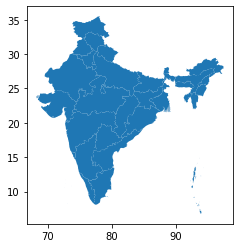

In [6]:
#It could be helpful to plot this as a base layer to differentiate the states
adm1.plot()

<AxesSubplot:>

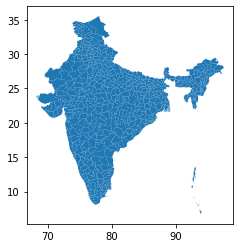

In [7]:
#District Level map 
adm2.plot()

### Loading up the ddl_nfhs_2011 dataset

In [8]:
#This needs to be cleaned still
df_socioeconomic_indicators = pd.read_csv('data/Indicators/ddl_nfhs_2011.csv',delimiter=',')
df_socioeconomic_indicators.head()

,pc11_district_id,pc11_district_name,pc11_state_id,pc11_state_name,richest,poorest,water_dwelling,water_fetch_women,hand_wash_water,hand_wash_soap,no_toilet,firewood,num_rooms,mem_per_room,dum_65p,ex_diab_broad_ind_fem,ex_htn_broad_ind_fem,bmigrt27_5_fem,csmoke_fem
0,1.0,Kupwara,1,Jammu & Kashmir,8.311805,8.311969,7.057641,94.276848,96.740593,79.543213,0.826517,50.830387,2.346276,2.950211,34.456902,6.149359,20.011179,8.750773,2.286568
1,2.0,Badgam,1,Jammu & Kashmir,13.833916,1.934850,5.946562,93.986191,97.964149,89.273155,0.509206,36.995975,2.627664,2.467012,34.934296,8.610390,16.215515,15.766848,5.841035
2,3.0,LehLadakh,1,Jammu & Kashmir,6.757979,3.378413,6.472993,82.190422,76.990524,61.748947,1.690710,9.061338,2.088325,2.106857,29.558363,3.777166,9.615542,8.448392,0.089099
3,4.0,Kargil,1,Jammu & Kashmir,3.752654,18.584255,2.996613,87.871864,50.327682,41.393616,0.834409,36.651791,2.346389,2.533801,26.990757,0.854169,12.237219,4.230742,0.381606
4,5.0,Punch,1,Jammu & Kashmir,16.886778,11.014970,2.295900,94.575592,77.891991,58.317440,38.312347,77.006042,2.319419,2.831645,22.103603,7.220634,20.580841,10.000585,0.782809


In [9]:
#Replacing column name to make it easy to merge
adm1.rename(columns={'NAME_1':'pc11_state_name'}, inplace=True)
adm2.rename(columns={'NAME_1':'pc11_state_name'}, inplace=True)

### Merge 

In [10]:
df_merge_district =  adm2.merge(df_socioeconomic_indicators, on='pc11_state_name')

In [28]:
adm2

,pc11_state_name,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,Andhra Pradesh,"POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,Andhra Pradesh,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,Andhra Pradesh,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."
...,...,...
589,West Bengal,"MULTIPOLYGON (((88.83472 21.60722, 88.83500 21..."
590,West Bengal,"POLYGON ((85.88916 23.15176, 85.88641 23.15335..."
591,West Bengal,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
592,West Bengal,"MULTIPOLYGON (((88.45847 25.59628, 88.45979 25..."


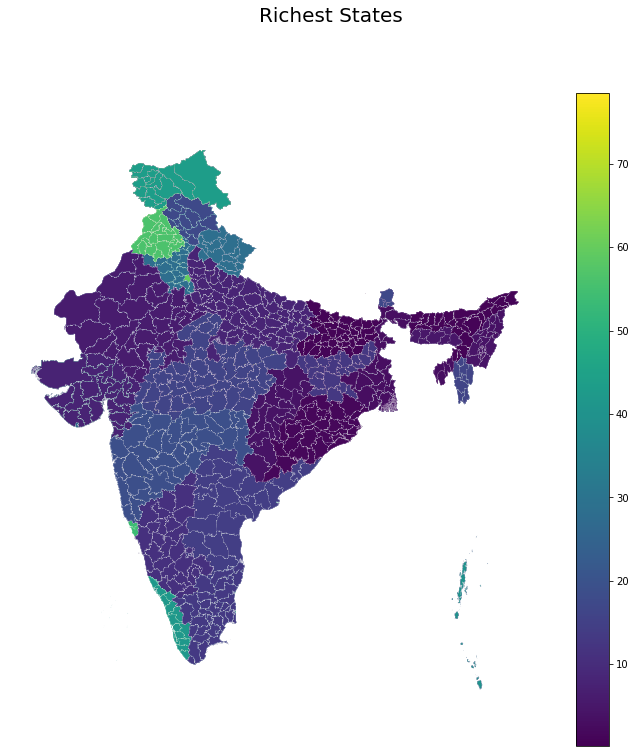

In [11]:
f, ax = plt.subplots(1, figsize=(12, 12))
df_merge_district.plot(column='richest',cmap='viridis', alpha=1, edgecolor='w', linewidth=0.1, ax = ax, legend=True)
ax.set_axis_off()
f.suptitle('Richest States', size=20)
plt.show()

In [14]:
# _ = sns.pairplot(df_merge_district, kind='reg', diag_kind='kde')

In [15]:
migration_df = pd.read_stata('data/district_migration_pc11.dta')


In [16]:
migration_df

,pc11_state_id,pc11_district_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,01,001,8185802.0,0.000751,0.000080,10900000.0,0.001468,0.000118,8185802,0.002328,0.000247,10900000,0.001601,1.283000e-04
1,01,002,8185802.0,0.001551,0.000143,10900000.0,0.001404,0.000097,8185802,0.002037,0.000188,10900000,0.001185,8.220000e-05
2,01,003,8185802.0,0.000427,0.000007,10900000.0,0.006163,0.000076,8185802,0.006820,0.000111,10900000,0.000000,0.000000e+00
3,01,004,8185802.0,0.000433,0.000007,10900000.0,0.005456,0.000071,8185802,0.001697,0.000029,10900000,0.000000,0.000000e+00
4,01,005,8185802.0,0.001091,0.000064,10900000.0,0.000412,0.000018,8185802,0.004508,0.000263,10900000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,8185802.0,0.038693,0.000198,10900000.0,0.005110,0.000020,8185802,0.021653,0.000111,10900000,0.000253,9.720000e-07
636,34,637,8185802.0,0.011552,0.000283,10900000.0,0.030466,0.000562,8185802,0.011098,0.000271,10900000,0.006689,1.233000e-04
637,35,638,8185802.0,0.042723,0.000192,10900000.0,0.024437,0.000083,8185802,0.064208,0.000289,10900000,0.000000,0.000000e+00
638,35,639,8185802.0,0.033330,0.000430,10900000.0,0.103715,0.001008,8185802,0.011106,0.000143,10900000,0.001146,1.110000e-05


In [20]:
deaths_pc11  = pd.read_stata('data/covid_infected_deaths_pc11.dta')
deaths_30_07 = deaths_pc11[deaths_pc11.date == '2020-07-30']
deaths_30_07 = deaths_30_07.drop(columns=['date'])
deaths_30_07.to_csv('data/covid_infected_deaths_30.07.2020.csv')
deaths_30_07.set_index("pc11_state_id", inplace = True)
state_cases = deaths_30_07.sum(level='pc11_state_id')
# state_cases.to_csv('data/covid_state_infected_deaths_30.07.2020.csv')

In [18]:
covid_df

,pc11_state_id,pc11_district_id,date,total_cases,total_deaths
0,,000,2020-01-30,0.0,0.0
1,,000,2020-02-02,0.0,0.0
2,,000,2020-02-03,0.0,0.0
3,,000,2020-03-02,0.0,0.0
4,,000,2020-03-03,0.0,0.0
...,...,...,...,...,...
97939,35,640,2020-07-26,0.0,0.0
97940,35,640,2020-07-27,0.0,0.0
97941,35,640,2020-07-28,0.0,0.0
97942,35,640,2020-07-29,0.0,0.0


In [21]:
state_cases

,total_cases,total_deaths
pc11_state_id,,
,452.172062,5.261197
01,21247.000000,371.000000
02,2506.000000,13.000000
03,15456.000000,370.000000
04,1016.000000,14.000000
05,7065.000000,76.000000
06,34219.000000,417.000000
07,134403.000000,3936.000000
08,40629.000000,630.000000


In [26]:
pollution_df = pd.read_stata('data/Indicators/ddl_pollution_sedac_2011.dta')
pollution_df = pollution_df.drop(['pc11_district_name', 'pc11_state_name'], axis=1)
pollution_df

,pc11_district_id,pc11_state_id,mean_pollution
0,001,1,29.339097
1,002,1,38.904636
2,003,1,3.993170
3,004,1,8.861835
4,005,1,35.535978
...,...,...,...
635,636,34,22.700000
636,637,34,24.778195
637,638,35,4.545310
638,639,35,11.607143
